# Implementing Multiple Linear Regression

We are now ready to actually implement a multiple regression model from scratch using Python!

As we did in univariate linear regression, we'll start by importing two libraries: `numpy` for handling matrix computations, and `pandas` for importing, exporting and visualizing our data.

Recall our importing syntax:

In [1]:
import numpy as np
import pandas as pd

We'll now use `pandas` to read our apartments price dataset into a `pandas` dataframe `df`.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/marciorvneto/ml-course/main/multivariate-linear-regression/apartments.csv")
df

,area,distance,price
0,233.195903,5.225684,95.583693
1,622.439384,4.307008,436.316403
2,224.031493,0.569811,409.196526
3,651.166545,1.252389,1056.426581
4,393.046713,2.562094,481.424518
...,...,...,...
95,367.964697,4.186910,269.551966
96,580.285852,3.323017,578.758837
97,112.234827,1.846154,160.462673
98,443.571189,1.528155,682.260565


## Visualizing our data using scatter plots

It is always a good idea to get a sense of our data before attempting to train any models on it. For high-dimensional data, a nice way of visualizing pairwise relations between features is by using a scatter plot matrix. Pandas makes this very simple for us:

array([[<AxesSubplot:xlabel='area', ylabel='area'>,
        <AxesSubplot:xlabel='distance', ylabel='area'>,
        <AxesSubplot:xlabel='price', ylabel='area'>],
       [<AxesSubplot:xlabel='area', ylabel='distance'>,
        <AxesSubplot:xlabel='distance', ylabel='distance'>,
        <AxesSubplot:xlabel='price', ylabel='distance'>],
       [<AxesSubplot:xlabel='area', ylabel='price'>,
        <AxesSubplot:xlabel='distance', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>]], dtype=object)

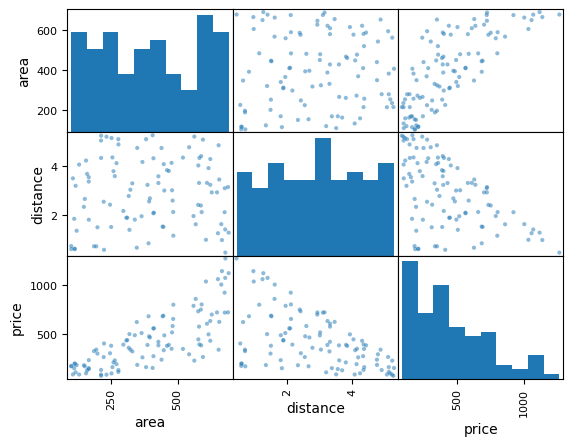

In [3]:
pd.plotting.scatter_matrix(df)

## Splitting our data into training and testing datasets

As we've discussed before, we should split our dataset into a training dataset and a testing dataset. We fit our model with the training data, and evaluate its performance using data that it's never seen before - the test data.

We'll proceed as before, by doing a 70%/30% split on our data:

In [4]:
percent_training = 0.7
percent_test = 1 - percent_training

As we've mentioned in our last demonstration, it's good practice to shuffle our training data to break possible sequential correlations between our data points.

In [5]:
num_total_data = len(df)                                  # Total number of data points
num_training_data = int(percent_training*num_total_data)  # Number of training data points
num_test_data = num_total_data - num_training_data        # Number of test data points

indices = np.arange(num_total_data)                       # Create an array of indices for our data
np.random.shuffle(indices)                                # Shuffle the indices
indices

array([19, 73, 36, 31, 35, 42, 97, 64, 39, 85, 51, 12, 67, 45, 77, 40, 15,
       44, 66, 23, 14, 90, 38, 26, 94, 55, 33, 72, 58, 87,  5, 21,  2, 25,
       80, 29,  1, 88, 84, 75,  7, 93, 63, 48, 91, 98, 81, 95, 28, 53, 92,
       69, 59, 49, 68, 32,  3, 65, 18,  4, 52, 30,  0,  9, 71, 20, 37, 79,
       43, 22, 60, 57, 54, 82, 89, 70, 27, 86, 11, 78,  8, 76, 83, 17, 34,
       50, 24, 41, 74, 46, 16, 96, 47, 61, 13, 99, 62,  6, 10, 56])

Notice that the indices have been permuted. Now, all we've got left to do is select the first `num_training_data` indices as our training indices, and select the remaining ones to be our test indices:

In [6]:
training_indices = indices[:num_training_data]
test_indices = indices[num_training_data:]

# Building the design matrix

Recall that in order to find the multiple linear regression coefficients $\hat{\beta}$, we need to solve the following system of equations, also known as the *normal equations*:

$$(\mathbb{X}^T\mathbb{X})\hat{\beta} = \mathbb{X}^T\mathbb{Y}$$

The matrix $\mathbb{X}$ is the so-called *design matrix*. Recall that its first column is made of ones, and each subsequent column corresponds to a feature of our model.

Numpy and pandas make creating this matrix quite straightforward. We first convert our pandas dataframe to a numpy array `dataset`:

In [7]:
dataset = df.to_numpy()

We can now separate our training data from our test data by taking the corresponding rows from `dataset`:

In [8]:
training_data = dataset[training_indices]
test_data = dataset[test_indices]

`training_data` and `test_data` are two numpy matrices containing our train and test data. Now let's create the design matrix using our training data.

The first thing we need is a column of ones. Numpy's function `ones` allows us to create an array of ones of whichever shape we like. We need a column of ones with `num_training_data` elements:

In [9]:
col_ones = np.ones((num_training_data,1))
col_ones

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

The next columns correspond to our features. By inspecting our data, we notice that the first and second columns (indices 0 and 1, in Python talk) correspond to area and distance. The third column (index 2), on the other hand, corresponds to the price, our label.

Therefore, we only need to include columns from 0 to 2 (not including). In Python, we can isolate them like this:

In [10]:
features = training_data[:, 0:2]   # 0:2 means 0 and 1, 2 is not included
features

array([[4.47902686e+02, 4.09549559e+00],
       [2.46574520e+02, 2.42818667e+00],
       [1.00985304e+02, 7.25352309e-01],
       [2.22733328e+02, 2.54871779e+00],
       [4.46597715e+02, 1.51053836e+00],
       [6.22289852e+02, 3.24686939e+00],
       [1.12234827e+02, 1.84615386e+00],
       [5.94886432e+02, 5.10605570e+00],
       [6.91374642e+02, 1.27672313e+00],
       [3.30045440e+02, 3.30670578e+00],
       [3.90958645e+02, 8.37447668e-01],
       [3.64785534e+02, 1.95126626e+00],
       [1.21305419e+02, 1.35570500e+00],
       [3.81693023e+02, 5.12498320e+00],
       [3.96049031e+02, 2.68970655e+00],
       [2.55458558e+02, 4.37321006e+00],
       [2.64451877e+02, 3.60422195e+00],
       [1.01328528e+02, 5.99108184e-01],
       [3.16629051e+02, 2.78347755e+00],
       [2.52152923e+02, 5.17174739e+00],
       [6.27962219e+02, 2.93358783e+00],
       [6.15824132e+02, 3.93394685e+00],
       [4.83877106e+02, 1.15125038e+00],
       [1.99367717e+02, 1.49820220e+00],
       [4.088427

Now we need to **horizontally stack** these columns to complete our design matrix. We do that using the funciton `hstack`:

In [11]:
X = np.hstack([col_ones, features])
X

array([[1.00000000e+00, 4.47902686e+02, 4.09549559e+00],
       [1.00000000e+00, 2.46574520e+02, 2.42818667e+00],
       [1.00000000e+00, 1.00985304e+02, 7.25352309e-01],
       [1.00000000e+00, 2.22733328e+02, 2.54871779e+00],
       [1.00000000e+00, 4.46597715e+02, 1.51053836e+00],
       [1.00000000e+00, 6.22289852e+02, 3.24686939e+00],
       [1.00000000e+00, 1.12234827e+02, 1.84615386e+00],
       [1.00000000e+00, 5.94886432e+02, 5.10605570e+00],
       [1.00000000e+00, 6.91374642e+02, 1.27672313e+00],
       [1.00000000e+00, 3.30045440e+02, 3.30670578e+00],
       [1.00000000e+00, 3.90958645e+02, 8.37447668e-01],
       [1.00000000e+00, 3.64785534e+02, 1.95126626e+00],
       [1.00000000e+00, 1.21305419e+02, 1.35570500e+00],
       [1.00000000e+00, 3.81693023e+02, 5.12498320e+00],
       [1.00000000e+00, 3.96049031e+02, 2.68970655e+00],
       [1.00000000e+00, 2.55458558e+02, 4.37321006e+00],
       [1.00000000e+00, 2.64451877e+02, 3.60422195e+00],
       [1.00000000e+00, 1.01328

Nice! Let us now take the last column of our training data to get our prices:

In [12]:
Y = training_data[:,-1]    # This is equivalent to training_data[:,2]. "-1" means "last index"
Y

array([ 341.39483372,  311.10216494,  179.27027801,  272.61261938,
        689.30399728,  635.18467295,  160.4626726 ,  273.40983118,
       1116.66436173,  329.37522468,  682.85762067,  514.08169   ,
        191.918824  ,  171.40996354,  469.83165371,  171.39172528,
        239.3565539 ,  183.84592183,  366.07566842,  107.91273206,
        700.33615336,  500.92849545,  799.48385071,  307.62928582,
        561.23857169,  386.44943006,  857.68686668,  503.79989264,
        802.00265483,  719.99530362,  395.78399345,  218.75048027,
        409.19652603,  332.26271275, 1137.07074966,  143.61692006,
        436.31640319,  347.92806249,  139.34261543,  443.83618124,
        561.05003151,  608.18402115,  721.85179111,  390.53973305,
        161.00066679,  682.26056532,  241.56062451,  269.55196595,
        920.53743251,  179.74947142,  394.30673172,  450.67444314,
        246.49788836,  390.42089627,  426.21652547,  354.49636926,
       1056.42658124,  109.46554566,  356.23945657,  481.42451

## Solving for the model parameters

All we need to do now is solve the linear system corresponding to the normal equations.

We're in luck, because `numpy` is excellent at solving linear systems! In fact, we can solve very large systems very quickly and with great precision.

In order to leverage `numpy`'s system solving capabilities, we need to express our linear system as:

$$ A\mathbf{x} = \mathbf{b} $$

Where $A$ is a matrix of constant coefficients, $\mathbf{b}$ is a vector (or column matrix) of constants, and $\mathbf{x}$ is our vector of unknowns.

Let's compare this equation with the normal equations:

$$(\mathbb{X}^T\mathbb{X})\hat{\beta} = \mathbb{X}^T\mathbb{Y}$$

Our vector of unknowns here are the $\hat{\beta}$. Likewise, we find that:

* $A = \mathbb{X}^T\mathbb{X}$
* $\mathbf{b} = \mathbb{X}^T\mathbb{Y}$

Let's see how we can build  $A$ and $\mathbf{b}$ using `numpy`:

In [13]:
A = X.T.dot(X)           # Transposes X and multiplies it by X
b = X.T.dot(Y)           # Transposes X and multiplies it by Y

Solving the system for $\hat{\beta}$ is now as simple as calling a function. To be more precise, we'll be calling the function `solve`, which is stored in the linear algebra module `linalg` of `numpy`:

In [14]:
beta_hat = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
beta_hat

array([ 271.42315635,    1.20555927, -107.25915327])

## Evaluating our model's performance

As before, in order to evaluate how well our model should perform on real-world data, we'll calculate the mean squared error, MSE, using our test data, which we expect to be a good proxy to real world data.

Let us begin by defining a function `mse`:

In [15]:
def mse(beta, x, y_real):
    y_predicted = x.dot(beta)
    error = np.mean((y_real - y_predicted)**2)
    return error

Let's see how well we're doing when we plug in our test data:

In [16]:
X_test = np.hstack([np.ones((num_test_data,1)), test_data[:,0:2]])
Y_test = test_data[:,-1]

test_error = mse(beta_hat, X_test, Y_test)
test_error

6663.507546369088

## Graphically visualizing our model's quality

It's nice to get a sense of how well our model behaves in the test data by plotting the predicted prices versus their actual values.

If our predictions were perfect, all our values would line up along the line $y = x$. In practice, however, this is not the case. The more our predicted points deviate from this line, the worse our predictions are.

Let's see how we can visualize our data using `matplotlib`:

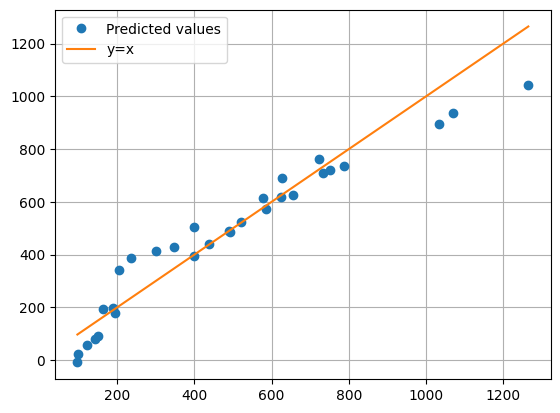

In [20]:
import matplotlib.pyplot as plt

Y_predicted = X_test.dot(beta_hat)

plt.plot(Y_test, Y_predicted, 'o')
x = np.linspace(np.min(Y_test), np.max(Y_test))

plt.plot(x,x)
plt.grid()
plt.legend(["Predicted values", "y=x"])

Not bad at all, but there's room for improvement. In the next lectures, we'll see how we can leverage our 